## CDS 513: Predictive Business Analytics
***
## Market Basket Analysis 

<img src="01.png" style="width:60%;margin-left:auto;margin-right:auto;">

Amazon, Netflix and many other popular companies rely on Market Basket Analysis to produce meaningful product recommendations. Market Basket Analysis is a powerful tool for translating vast amounts of customer transaction and viewing data into simple rules for product promotion and recommendation. In this notebook, we’ll learn how to perform Market Basket Analysis using the Apriori algorithm, standard and custom metrics, association rules, aggregation and pruning, and visualization.

#### What is market basket analysis?
1. Identify products frequently purchased together.
    - Bookstore Ex:
        - Biography and history
        - Fiction and poetry
        
2. Construct recommendations based on these
    - Bookstore Ex:
        - Place biography and history sections together.
        - Keep fiction and history apart.
        
#### The use cases of market basket analysis
1. Build Netflix-style recommendations engine.
2. Improve product recommendations on an e-commerce store.
3. Cross-sell products in a retail setting.
4. Improve inventory management.
5. Upsell products.

- Market basket analysis
    - Construct association rules
    - Identify items frequently purchased together
- Association rules
    - {antecedent} -> {consequent}
        - {fiction} -> {biography}

### Imports

You need to install **mlxtend** libray using command ; **pip install mlxtend**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

C:\Users\Haziqah Shamsudin\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Haziqah Shamsudin\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


### Dataset

The contains information about customers buying different grocery items.

In [3]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [6]:
data.shape

(7501, 20)

### EDA

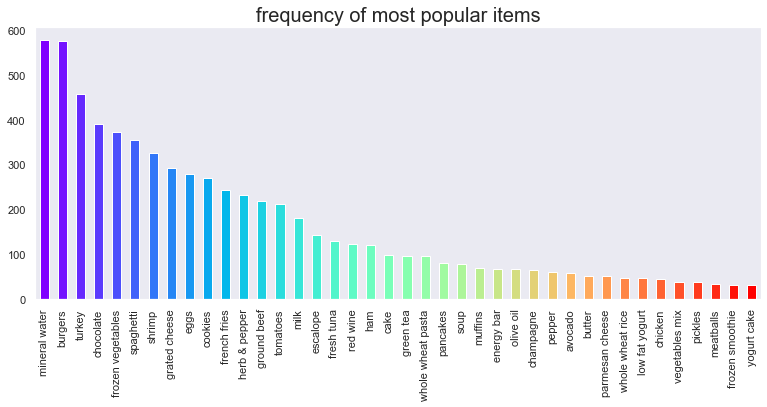

In [7]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [8]:
import networkx as nx
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

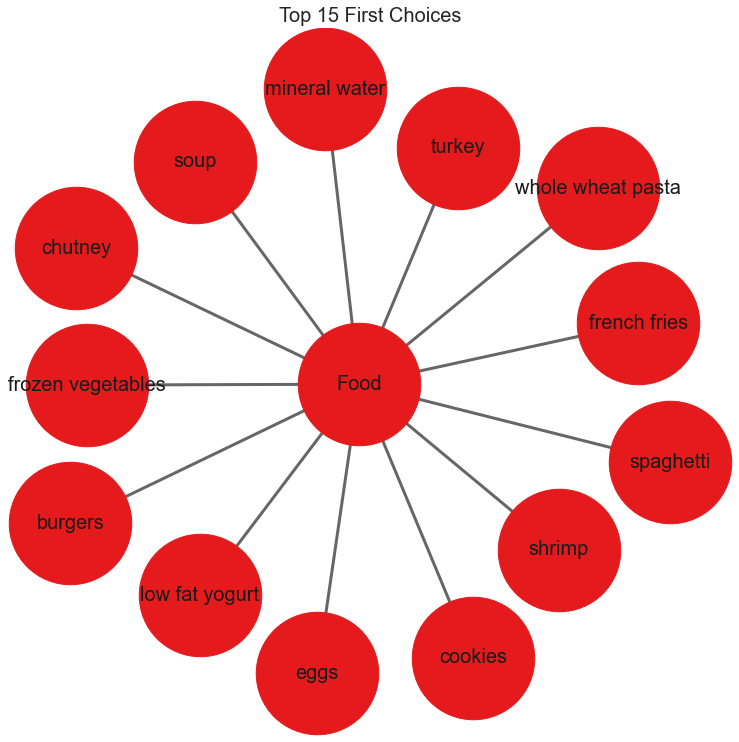

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

### Getting the list of transactions
Once we have read the dataset, we need to get the list of items in each transaction. SO we will run two loops here. One for the total number of transactions, and other for the total number of columns in each transaction. This list will work as a training set from where we can generate the list of association rules.

In [10]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [11]:
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil',
  'Food']]

### Association Rules 

- Association rule
    - Contains antecedent and consequent
        - {health} -> {cooking}
- Multi-antecedent rule
    - {humor, travel} -> {language}
- Multi-consequent rule
    - {biography} -> {history, language}
- Multi-antecedent and consequent rule
    - {biography, non-fiction} -> {history, language}

### Difficulty of selecting rules

- Finding useful rules is difficult
    - Set of all possible rules is large.
    - Most rules are not useful.
    - Must discard most rules.
- What if we restrict ourselves to simple rules?
    - One antecedent and one consequent.
    - Still challenging, even for small dataset.
    
<img src="02.png" style="width:60%;margin-left:auto;margin-right:auto;">

In [12]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [13]:
print('# of items:',len(items))
print(list(items))

# of items: 122
['candy bars', 'babies food', 'frozen vegetables', 'green beans', 'whole wheat rice', 'eggplant', 'pepper', 'frozen smoothie', 'eggs', 'gums', 'toothpaste', 'cream', 'Food', 'french fries', 'barbecue sauce', 'salt', 'brownies', 'rice', 'chili', 'oatmeal', 'white wine', 'body spray', 'strawberries', 'mint green tea', 'shrimp', 'melons', 'tomato sauce', 'flax seed', 'green tea', 'tomato juice', 'zucchini', 'olive oil', 'blueberries', 'magazines', 'ham', 'dessert wine', 'red wine', 'mayonnaise', 'extra dark chocolate', 'whole weat flour', 'butter', 'bug spray', 'hand protein bar', 'burgers', 'parmesan cheese', 'chutney', 'nonfat milk', 'cauliflower', 'ketchup', 'sparkling water', 'pancakes', 'mashed potato', 'salad', 'light mayo', 'napkins', 'water spray', 'milk', 'clothes accessories', 'fresh tuna', 'chocolate', 'cookies', 'cooking oil', 'fromage blanc', 'hot dogs', 'strong cheese', 'french wine', 'bramble', 'honey', 'cereals', 'gluten free bar', 'energy drink', 'bacon', 

In [14]:
if 'nan' in items: items.remove('nan')
print(list(items))

['candy bars', 'babies food', 'frozen vegetables', 'green beans', 'whole wheat rice', 'eggplant', 'pepper', 'frozen smoothie', 'eggs', 'gums', 'toothpaste', 'cream', 'Food', 'french fries', 'barbecue sauce', 'salt', 'brownies', 'rice', 'chili', 'oatmeal', 'white wine', 'body spray', 'strawberries', 'mint green tea', 'shrimp', 'melons', 'tomato sauce', 'flax seed', 'green tea', 'tomato juice', 'zucchini', 'olive oil', 'blueberries', 'magazines', 'ham', 'dessert wine', 'red wine', 'mayonnaise', 'extra dark chocolate', 'whole weat flour', 'butter', 'bug spray', 'hand protein bar', 'burgers', 'parmesan cheese', 'chutney', 'nonfat milk', 'cauliflower', 'ketchup', 'sparkling water', 'pancakes', 'mashed potato', 'salad', 'light mayo', 'napkins', 'water spray', 'milk', 'clothes accessories', 'fresh tuna', 'chocolate', 'cookies', 'cooking oil', 'fromage blanc', 'hot dogs', 'strong cheese', 'french wine', 'bramble', 'honey', 'cereals', 'gluten free bar', 'energy drink', 'bacon', 'black tea', 'fr

In [15]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 14520
[('candy bars', 'babies food'), ('candy bars', 'frozen vegetables'), ('candy bars', 'green beans'), ('candy bars', 'whole wheat rice'), ('candy bars', 'eggplant')]


### One-hot encoding transaction data

Throughout we will use a common pipeline for preprocessing data for use in market basket analysis. The first step is to import a pandas DataFrame and select the column that contains transactions. Each transaction in the column will be a string that consists of a number of items, each separated by a comma. The next step is to use a lambda function to split each transaction string into a list, thereby transforming the column into a list of lists. Then we will transform the transactions into a one-hot encoded DataFrame, where each column consists of TRUE and FALSE values that indicate whether an item was included in a transaction.

In [16]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,asparagus,Food,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,...,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


### Metrics and pruning

- A metric is a measure of performance for rules.
    - {humor} -> {poetry}
        - 0.81
    - {fiction} -> {travel}
        - 0.23
        
- Pruning is the use of metrics to discard rules.
    - Retain: {humor} -> {poetry}
    - Discard: {action} -> {travel}
        
### The simplest metric

- The *support* metric measures the share of transactions that contain an itemset.

<img src="03.png" style="width:20%;margin-left:auto;margin-right:auto;">

In [17]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
Food,1.000000
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911


In [18]:
support.describe()

,support
count,121.000000
mean,0.040611
std,0.097542
min,0.000133
25%,0.007732
50%,0.015731
75%,0.042528
max,1.000000


### Confidence and lift

When support is misleading

1. Milk and bread frequently purchased together.
    - Support: {Milk} → {Bread}
2. Rule is not informative for marketing.
    - Milk and bread are both independently popular items.

#### The confidence metric
1. Can improve over **support** with additional metrics.
2. Adding **confidence** provides a more complete picture.
3. **Confidence** gives us the probability we will purchase *Y* given we have purchased *X*.

<img src="07.png" style="width:60%;margin-left:auto;margin-right:auto;">

- The probability of purchasing both milk and coffee does not change if we condition on purchasing milk. Purchasing milk tells us nothing about purchasing coffee.

#### The lift metric
- Lift provides another metric for evaluating the relationship between items.
    - Numerator: Proportion of transactions that contain *X* and *Y*.
    - Denominator: Proportion if *X* and *Y* are assigned randomly and independently to transactions.
    
<img src="08.png" style="width:20%;margin-left:auto;margin-right:auto;">

- Lift  >1 tells us 2 items occur in transactions together more often than we would expect based on their individual support values. This means the relationship is unlikely to be explained by random chance. This natural threshold is convenient for filtering purposes.
- Lift  <1 tells us 2 items are paired together less frequently in transactions than we would expect if the pairings occurred by random chance.

### Recommending food with support

A grocery-store wants to get members to eat more and has decided to use market basket analysis to figure out how. They approach you to do the analysis and ask that you use the five most highly-rated food items.

In [19]:
# Compute support for burgers and french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers and mineral water
supportBM = np.logical_and(onehot['burgers'], onehot['mineral water']).mean()

# Compute support for french fries and mineral water
supportFM = np.logical_and(onehot['french fries'], onehot['mineral water']).mean()

# Print support values
print("burgers and french fries: %.2f" % supportBF)
print("burgers and mineral water: %.2f" % supportBM)
print("french fries and mineral water: %.2f" % supportFM)

burgers and french fries: 0.02
burgers and mineral water: 0.02
french fries and mineral water: 0.03


### Computing the support metric
Previously we one-hot encoded a small grocery store's transactions as the DataFrame onehot. In this exercise, we'll make use of that DataFrame and the support metric to help the store's owner. First, she has asked us to identify frequently purchased items, which we'll do by computing support at the item-level. And second, she asked us to check whether the rule {mineral water} → {french fries} has a support of over  0.05
 .

In [20]:
# Add a mineral water+french fries column to the DataFrame onehot
onehot['mineral water+french fries'] = np.logical_and(onehot['mineral water'], onehot['french fries'])

# Compute the support
support = onehot.mean()
val = support.loc['mineral water+french fries']

# Print the support values
print(f'mineral water+french fries support = {val}')

mineral water+french fries support = 0.03372883615517931


### Refining support with confidence
After reporting your findings from the previous exercise, the store's owner asks us about the direction of the relationship. Should they use mineral water to promote french fries or french fries to promote mineral water?

We decide to compute the confidence metric, which has a direction, unlike support. We'll compute it for both {mineral water} → {french fries} and {french fries} → {mineral water}.

In [21]:
# Compute support for mineral water and french fries
supportMF = np.logical_and(onehot['mineral water'], onehot['french fries']).mean()

# Compute support for mineral water
supportM = onehot['mineral water'].mean()

# Compute support for french fries
supportF = onehot['french fries'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('mineral water = {0:.2f}, french fries = {1:.2f}'.format(confidenceMM, confidenceMF))

mineral water = 0.14, french fries = 0.20


Even though the support is identical for the two association rules, the confidence is much higher for french fries -> mineral water, since french fries has a higher support than mineral water.

### Further refinement with lift
Once again, we report our results to the store's owner: Use french fries to promote mineral water, since the rule has a higher confidence metric. The store's owner thanks us for the suggestion, but asks us to confirm that this is a meaningful relationship using another metric.

You recall that lift may be useful here. If lift is less than  1
 , this means that mineral water and french fries are paired together less frequently than we would expect if the pairings occurred by random chance.

In [22]:
# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)

Lift: 0.83


As it turns out, lift is less than  1.0. This does not give us good confidence that the association rule we recommended did not arise by random chance.

### Leverage and Conviction

<img src="05.png" style="width:60%;margin-left:auto;margin-right:auto;">

### Computing conviction
The store's owner asks us if we are able to compute conviction for the rule {burgers} → {french fries}, so she can decide whether to place the items next to each other on the company's website.

In [23]:
# Compute support for burgers AND french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers
supportB = onehot['burgers'].mean()

# Compute support for NOT french fries
supportnF = 1.0 - onehot['french fries'].mean()

# Compute support for burgers and NOT french fries
supportBnF = supportB - supportBF

# Compute and print conviction for burgers -> french fries
conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 1.11


Notice that the value of conviction was greater than  1, suggesting that the rule if burgers then french fries is supported.

### Computing conviction with a function
The store's owner asks us if we are able to compute conviction for every pair of food items in the grocery-store dataset, so she can use that information to decide which food items to locate closer together on the website.

We agree to take the job, but realize that we a need more efficient way to compute conviction, since we will need to compute it many times. We decide to write a function that computes it. It will take two columns of a pandas DataFrame as an input, one antecedent and one consequent, and output the conviction metric.

In [24]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

### Computing leverage with a function

In [25]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA

### Promoting food with conviction
Previously we defined a function to compute conviction. We were asked to apply that function to all two-food items permutations of the grocery-store dataset. We'll test the function by applying it to the three most popular food items, which we used in earlier exercises: burgers, french fries, and mineral water.

In [26]:
# Compute conviction for burgers -> french fries and french fries -> burgers
convictionBF = conviction(onehot['burgers'], onehot['french fries'])
convictionFB = conviction(onehot['french fries'], onehot['burgers'])

# Compute conviction for burgers -> mineral water and mineral water -> burgers
convictionBM = conviction(onehot['burgers'], onehot['mineral water'])
convictionMB = conviction(onehot['mineral water'], onehot['burgers'])

# Compute conviction for french fries -> mineral water and mineral water -> french fries
convictionFM = conviction(onehot['french fries'], onehot['mineral water'])
convictionMF = conviction(onehot['mineral water'], onehot['french fries'])

# Print results
print('french fries -> burgers: ', convictionFB)
print('burgers -> french fries: ', convictionBF)

french fries -> burgers:  1.0476495106531305
burgers -> french fries:  1.1088435652342468


### Association and Dissociation

<img src="06.png" style="width:60%;margin-left:auto;margin-right:auto;">

### Computing association and dissociation
The store's owner has returned to you once again about your recommendation to promote french fries using burgers. They're worried that the two might be dissociated, which could have a negative impact on their promotional effort. They ask you to verify that this is not the case.

You immediately think of Zhang's metric, which measures association and dissociation continuously. Association is positive and dissociation is negative.

In [27]:
# Compute the support of burgers and french fries
supportT = onehot['burgers'].mean()
supportP = onehot['french fries'].mean()

# Compute the support of both food items
supportTP = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)

0.3533836982354581


Once again, the association rule if burgers then french fries proved robust. It had a positive value for Zhang's metric, indicating that the two food items are not dissociated.

### Defining Zhang's metric
In general, when we want to perform a task many times, we'll write a function, rather than coding up each individual instance. In this exercise, we'll define a function for Zhang's metric that takes an antecedent and consequent and outputs the metric itself.

In [28]:
# Define a function to compute Zhang's metric
def zhang(antecedent, consequent):
    # Compute the support of each book
    supportA = antecedent.mean()
    supportC = consequent.mean()

    # Compute the support of both books
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Complete the expressions for the numerator and denominator
    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    # Return Zhang's metric
    return numerator / denominator

### Applying Zhang's metric
The store's owner has sent you a list of itemsets she's investigating and has asked us to determine whether any of them contain items that are dissociated. When we're finished, she has asked that us to add the metric we use to a column in the rules DataFrame.

In [29]:
# Create rules DataFrame
rules_ = pd.DataFrame(rules, columns=['antecedents','consequents'])

# Define an empty list for metrics
zhangs, conv, lev, antec_supp, cons_supp, suppt, conf, lft = [], [], [], [], [], [], [], []

# Loop over lists in itemsets
for itemset in rules:
    # Extract the antecedent and consequent columns
    antecedent = onehot[itemset[0]]
    consequent = onehot[itemset[1]]
    
    antecedent_support = onehot[itemset[0]].mean()
    consequent_support = onehot[itemset[1]].mean()
    support = np.logical_and(onehot[itemset[0]], onehot[itemset[1]]).mean()
    confidence = support / antecedent_support
    lift = support / (antecedent_support * consequent_support)
    
    # Complete metrics and append it to the list
    antec_supp.append(antecedent_support)
    cons_supp.append(consequent_support)
    suppt.append(support)
    conf.append(confidence)
    lft.append(lift)
    lev.append(leverage(antecedent, consequent))
    conv.append(conviction(antecedent, consequent))
    zhangs.append(zhang(antecedent, consequent))
    
# Store results
rules_['antecedent support'] = antec_supp
rules_['consequent support'] = cons_supp
rules_['support'] = suppt
rules_['confidence'] = conf
rules_['lift'] = lft
rules_['leverage'] = lev
rules_['conviction'] = conv
rules_['zhang'] = zhangs

# Print results
rules_.sort_values('zhang',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
2969,shrimp,asparagus,0.071457,0.000133,0.000133,0.001866,13.994403,0.000124,1.001736,1.0
11850,ground beef,asparagus,0.098254,0.000133,0.000133,0.001357,10.177748,0.000120,1.001225,1.0
7169,chocolate,asparagus,0.163845,0.000133,0.000133,0.000814,6.103336,0.000111,1.000681,1.0
13050,whole wheat pasta,asparagus,0.029463,0.000133,0.000133,0.004525,33.941176,0.000129,1.004412,1.0
5249,burgers,asparagus,0.087188,0.000133,0.000133,0.001529,11.469419,0.000122,1.001398,1.0


In [30]:
rules_.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
count,14520.000000,14520.000000,14520.000000,14520.000000,14520.000000,14520.000000,1.440000e+04,14400.000000
mean,0.040611,0.040611,0.001906,0.052663,1.467719,0.000335,inf,-0.011728
std,0.097141,0.097141,0.007505,0.108745,1.864950,0.001148,NaN,0.621009
min,0.000133,0.000133,0.000000,0.000000,0.000000,-0.011697,7.616318e-01,-1.000000
25%,0.007732,0.007732,0.000133,0.004975,0.500009,-0.000046,9.953340e-01,-0.517778
50%,0.015731,0.015731,0.000400,0.021849,1.214494,0.000079,1.003948e+00,0.192710
75%,0.042528,0.042528,0.001333,0.058140,1.858384,0.000361,1.020828e+00,0.483074
max,1.000000,1.000000,0.238368,1.000000,45.460606,0.022088,inf,1.000000


In [31]:
rules_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14520 entries, 0 to 14519
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         14520 non-null  object 
 1   consequents         14520 non-null  object 
 2   antecedent support  14520 non-null  float64
 3   consequent support  14520 non-null  float64
 4   support             14520 non-null  float64
 5   confidence          14520 non-null  float64
 6   lift                14520 non-null  float64
 7   leverage            14520 non-null  float64
 8   conviction          14400 non-null  float64
 9   zhang               14400 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.1+ MB


Notice that most of the items were dissociated, which suggests that they would have been a poor choice to pair together for promotional purposes.

### Overview of market basket analysis
#### Standard procedure for market basket analysis.

1. Generate large set of rules.
2. Filter rules using metrics.
3. Apply intuition and common sense.

### Filtering with support and conviction
The store's owner has approached you with the DataFrame rules, which contains the work of a data scientist who was previously on staff. It includes columns for antecedents and consequents, along with the performance for each of those rules with respect to a number of metrics.

Our objective will be to perform multi-metric filtering on the dataset to identify potentially useful rules.

In [32]:
# Select the subset of rules with antecedent support greater than 0.05
rules_filtered = rules_[rules_['antecedent support'] > 0.05]

# Select the subset of rules with a consequent support greater than 0.01
rules_filtered = rules_[rules_['consequent support'] > 0.01]

# Select the subset of rules with a conviction greater than 1.01
rules_filtered = rules_[rules_['conviction'] > 1.01]

# Select the subset of rules with a lift greater than 1.0
rules_filtered = rules_[rules_['lift'] > 1.0]

# Print remaining rules
print(f'# of rules = {len(rules_)}')
print(f'# of rules after filtering = {len(rules_filtered)}')
print(rules_filtered.head())

# of rules = 14520
# of rules after filtering = 8598
   antecedents  consequents  antecedent support  consequent support   support  \
2   candy bars  green beans            0.009732            0.008666  0.000133   
8   candy bars         gums            0.009732            0.013465  0.000133   
9   candy bars   toothpaste            0.009732            0.008132  0.000133   
14  candy bars         salt            0.009732            0.009199  0.000267   
15  candy bars     brownies            0.009732            0.033729  0.000400   

    confidence      lift  leverage  conviction     zhang  
2     0.013699  1.580822  0.000049    1.005103  0.371029  
8     0.013699  1.017361  0.000002    1.000237  0.017232  
9     0.013699  1.684482  0.000054    1.005644  0.410339  
14    0.027397  2.978360  0.000177    1.018711  0.670773  
15    0.041096  1.218420  0.000072    1.007683  0.181027  


### Using multi-metric filtering to cross-promote food items
As a final request, the store's owner asks us to perform additional filtering. Our previous attempt returned  8598
  rules, but she wanted much less.

In [33]:
# Set the threshold for Zhang's rule to 0.65
rules_filtered = rules_filtered[rules_filtered['zhang'] > 0.65]

# Print rule
print(f'# of rules after filtering = {8598 - len(rules_filtered)}')
print(rules_filtered.head())

# of rules after filtering = 6911
   antecedents           consequents  antecedent support  consequent support  \
14  candy bars                  salt            0.009732            0.009199   
34  candy bars          dessert wine            0.009732            0.004399   
37  candy bars  extra dark chocolate            0.009732            0.011998   
46  candy bars           cauliflower            0.009732            0.004799   
47  candy bars               ketchup            0.009732            0.004399   

     support  confidence      lift  leverage  conviction     zhang  
14  0.000267    0.027397  2.978360  0.000177    1.018711  0.670773  
34  0.000133    0.013699  3.113740  0.000091    1.009428  0.685514  
37  0.000400    0.041096  3.425114  0.000283    1.030345  0.714997  
46  0.000133    0.013699  2.854262  0.000087    1.009023  0.656031  
47  0.000133    0.013699  3.113740  0.000091    1.009428  0.685514  
